# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create Time Series

In [ ]:
def plot_time_series(time, series):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)
    plt.show()

In [ ]:
def trend(time, slope=0):
    return slope * time

TIME:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
SERIES:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


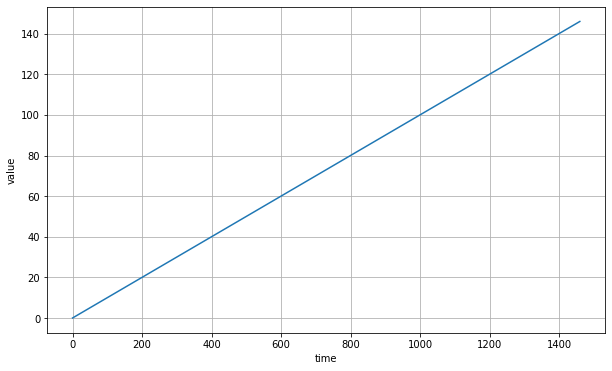

In [ ]:
time = np.arange(4 * 365 + 1)
print("TIME: ", time[:20])

baseline = 10
series = trend(time, slope=0.1)
print("SERIES: ", series[:20])

plot_time_series(time, series)

# 2. Create Seasonality

In [ ]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

In [ ]:
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

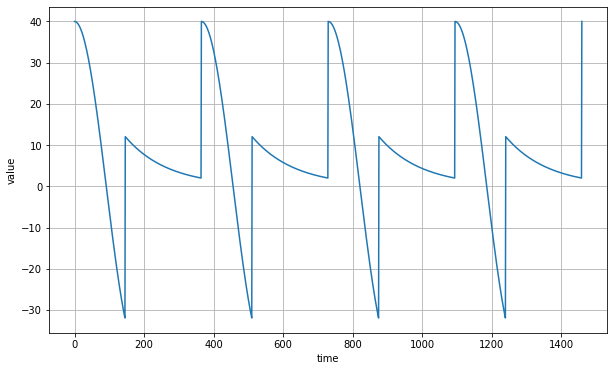

In [ ]:
baseline = 10
amplitude = 40

series = seasonality(time, period=365, amplitude=amplitude)
plot_time_series(time, series)

# 3. Add Trend & Seasonality

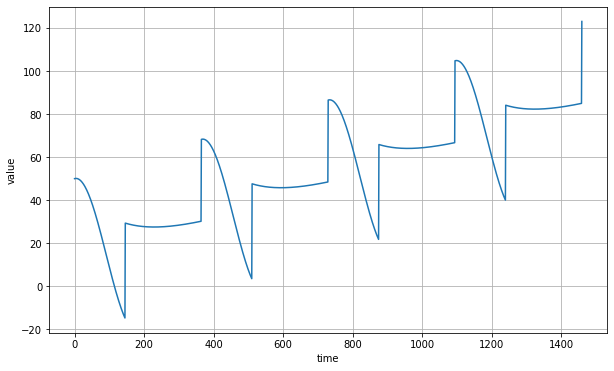

In [ ]:
slope = 0.05

series = baseline + trend(time, slope=slope) + seasonality(time, period=365, amplitude=amplitude)
plot_time_series(time, series)

# 4. Add Noise to Trend & Seasonality

In [ ]:
def noise(time, noise_level=1):
  return np.random.randn(len(time)) * noise_level

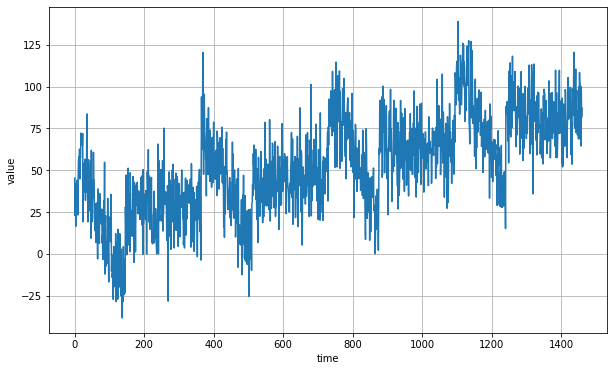

In [ ]:
noise_level = 15

noisy_series = series + noise(time, noise_level)
plot_time_series(time, noisy_series)

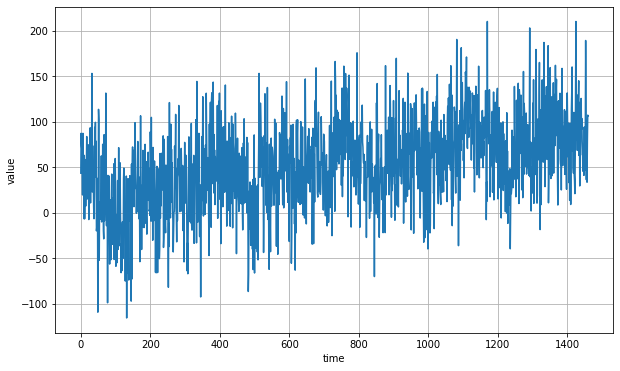

In [ ]:
noise_level = 40

noisy_series = series + noise(time, noise_level)
plot_time_series(time, noisy_series)

# 5. Autocorrelation

In [ ]:
def autocorrelation(time, amplitude):
  rho1 = 0.5
  rho2 = -0.1
  ar = np.random.randn(len(time + 50))
  ar[:50] = 100
  for step in range(50, len(time) + 50):
      ar[step] += rho1 * ar[step - 50]
      ar[step] += rho2 * ar[step - 33]
  return ar[50:] * amplitude

In [ ]:
def autocorrelation(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += rho * ar[step - 1]
    return ar[1:] * amplitude

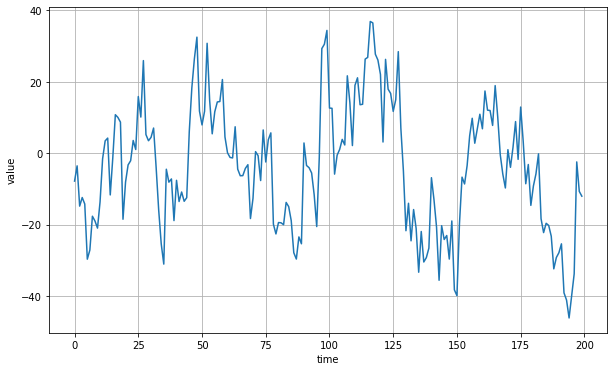

In [ ]:
series = autocorrelation(time, 10)
plot_time_series(time[:200], series[:200])

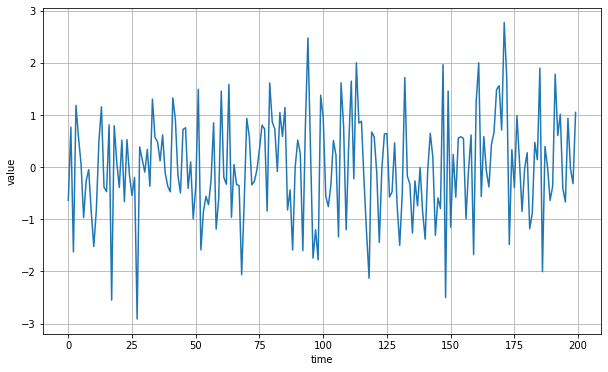

In [ ]:
series = noise(time)
plot_time_series(time[:200], series[:200])

# Autocorrelation + Trend

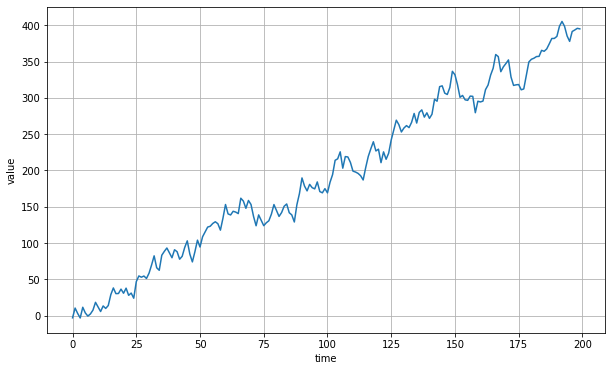

In [ ]:
series = autocorrelation(time, 10) + trend(time, 2)
plot_time_series(time[:200], series[:200])

# Autocorrelation + Trend + Seasonality

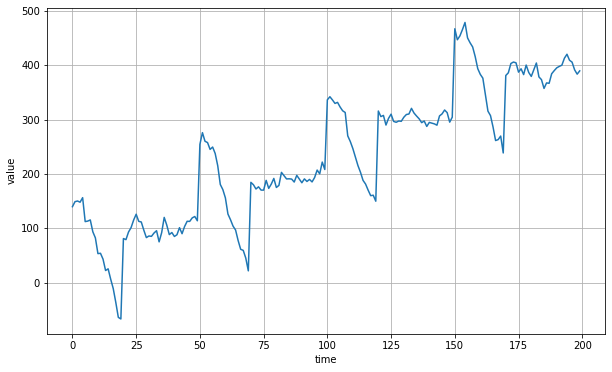

In [ ]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_time_series(time[:200], series[:200])

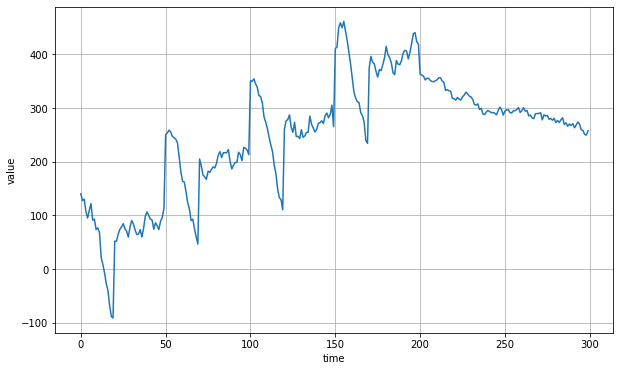

In [ ]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]

plot_time_series(time[:300], series[:300])

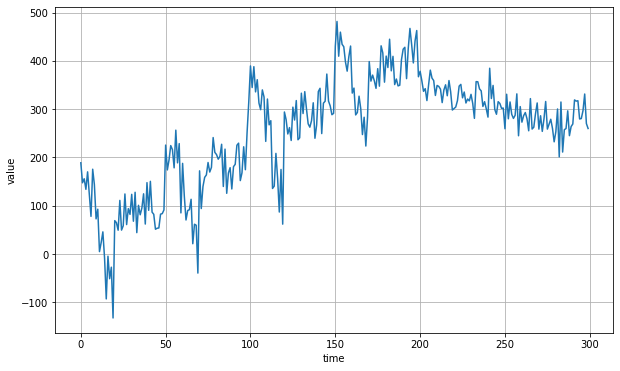

In [ ]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]

series += noise(time, 30)
plot_time_series(time[:300], series[:300])